## Jwean Dabre
## Roll no-13
## AIML-B1

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


In [22]:
x,y=make_moons(n_samples=300 , noise=0.25 , random_state=42)

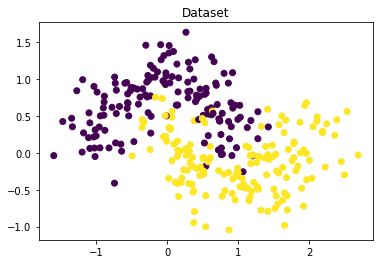

In [23]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.title("Dataset")
plt.show()


In [24]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

lr = LogisticRegression()

lr.fit(x_train_scaled, y_train)

y_pred_lr = lr.predict(x_test_scaled)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression
Accuracy: 0.8666666666666667
Confusion Matrix:
 [[34  5]
 [ 7 44]]


In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4)

dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree
Accuracy: 0.8555555555555555
Confusion Matrix:
 [[30  9]
 [ 4 47]]


In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

print("KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

KNN
Accuracy: 0.8555555555555555
Confusion Matrix:
 [[30  9]
 [ 4 47]]


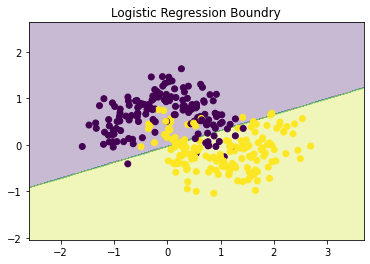

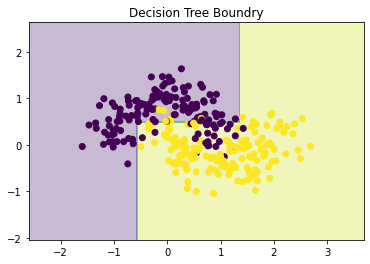

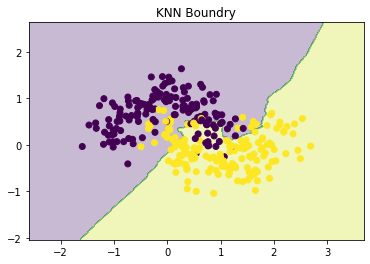

In [34]:
def plot_boundary(model, scaled, title):

    h = 0.02

    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid = np.c_[xx.ravel(), yy.ravel()]

    if scaled:
        grid = scaler.transform(grid)

    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.title(title)
    plt.show()
 
plot_boundary(lr, True, "Logistic Regression Boundry")
plot_boundary(dt, False, "Decision Tree Boundry")
plot_boundary(knn, True, "KNN Boundry")



